<a href="https://colab.research.google.com/github/SudoAnxu/SudoAnxu1/blob/main/stockPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


## Data Collection


In [2]:
def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data[['Close']]

Download AAPL stock data

In [3]:
stock_data = download_stock_data('AAPL', '2015-01-01', '2023-01-01')

[*********************100%***********************]  1 of 1 completed


## Data Preprocessing

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data)

 Create time series sequences

In [5]:
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

Split data into training and testing sets


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Build CNN Model

In [7]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_step, 1)),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

Train the model

In [15]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0021 - val_loss: 0.0040
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2543e-04 - val_loss: 0.0014
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.8756e-04 - val_loss: 0.0029
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.5269e-04 - val_loss: 0.0022
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.4297e-04 - val_loss: 0.0031
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7134e-04 - val_loss: 0.0013
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.9487e-04 - val_loss: 0.0021
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.1096e-04 - val_loss: 0.0036
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7131e-04 - val_loss: 0.0026
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2165e-04 - val_loss: 0.0108
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7758e-04 - val_loss: 0.0046
Epoch 12/20
49/49 ━━━━━

## Model Evaluation

In [16]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 
Test Loss: 0.0014015092747285962


## Predictions

In [17]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


## Plotting the Results

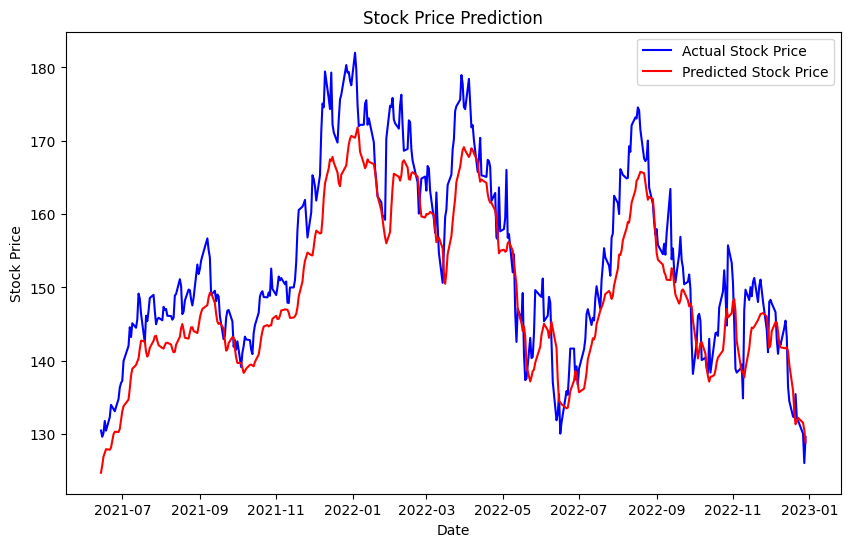

In [19]:
plt.figure(figsize=(10, 6))

# Actual stock prices
plt.plot(stock_data.index[time_step + len(X_train):time_step + len(X_train) + len(y_test)],
         stock_data['Close'][time_step + len(X_train):time_step + len(X_train) + len(y_test)],
         color='blue', label='Actual Stock Price')

# Predicted stock prices
plt.plot(stock_data.index[time_step + len(X_train):time_step + len(X_train) + len(predicted_stock_price)],
         predicted_stock_price,
         color='red', label='Predicted Stock Price')

plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
